 # Diabetes prediction  

In [164]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# PART 1: Data Handling

In [165]:
data=pd.read_csv("diabetes2.csv")

In [166]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [167]:
data.drop([], axis="columns",inplace=True)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [168]:
X = data.drop(["Outcome"],axis="columns")
Y = data['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [169]:
X.Age[0:10]

0    50
1    31
2    32
3    21
4    33
5    30
6    26
7    29
8    53
9    54
Name: Age, dtype: int64

In [170]:
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]

0    50
1    31
2    32
3    21
4    33
5    30
6    26
7    29
8    53
9    54
Name: Age, dtype: int64

In [171]:
train_test_split(X,Y,train_size = 0.8)

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 14             5      166             72             19      175  25.8   
 485            0      135             68             42      250  42.3   
 735            4       95             60             32        0  35.4   
 406            4      115             72              0        0  28.9   
 613            6      105             80             28        0  32.5   
 ..           ...      ...            ...            ...      ...   ...   
 760            2       88             58             26       16  28.4   
 169            3      111             90             12       78  28.4   
 303            5      115             98              0        0  52.9   
 619            0      119              0              0        0  32.4   
 404            5      168             64              0        0  32.9   
 
      DiabetesPedigreeFunction  Age  
 14                      0.587   51  
 485                  

In [172]:
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
Y_real

277    0
338    1
409    1
404    1
241    0
      ..
470    0
139    0
116    1
330    0
275    0
Name: Outcome, Length: 154, dtype: int64

In [173]:
len(X_test)

154

In [174]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
277            0      104             64             23      116  27.8   
338            9      152             78             34      171  34.2   
409            1      172             68             49      579  42.4   
404            5      168             64              0        0  32.9   
241            4       91             70             32       88  33.1   
..           ...      ...            ...            ...      ...   ...   
470            1      144             82             40        0  41.3   
139            5      105             72             29      325  36.9   
116            5      124             74              0        0  34.0   
330            8      118             72             19        0  23.1   
275            2      100             70             52       57  40.5   

     DiabetesPedigreeFunction  Age  
277                     0.454   23  
338                     0.893   33  
409                     0.702   28  
404                     0.135   41  
241                     0.446   22  
..                        ...  ...  
470                     0.607   28  
139                     0.159   28  
116                     0.220   38  
330                     1.476   46  
275                     0.677   25  

[154 rows x 8 columns]

# PART 2: Data Analysis  
* 2.1. Decision Tree
* 2.2. Logistic Regression
* 2.3. SVM (SVC)
* 2.4. KNN 


# PART 2.1. Decision Tree   

In [175]:
model_dt = tree.DecisionTreeClassifier(max_depth=6)
model_dt

DecisionTreeClassifier(max_depth=6)

In [176]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

In [177]:
model_dt.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [178]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [179]:
import numpy as np
Y_real = np.array(Y_real)
Y_real = Y_real.reshape(-1)
Y_real

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [180]:
result = pd.DataFrame({"Diabetis Real": Y_real.reshape(-1), "Diabetes Prediction": Y_pred_dt})
result

Diabetis Real  Diabetes Prediction
0                0                    0
1                1                    1
2                1                    1
3                1                    1
4                0                    0
..             ...                  ...
149              0                    0
150              0                    0
151              1                    1
152              0                    0
153              0                    0

[154 rows x 2 columns]

In [181]:
plt.figure(figsize=(200,250))
graph_tree = plot_tree (model_dt,feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],
                        class_names = ['Diabetes Occured','Diabetes Not Occured'],
                        filled=True,rounded=True,fontsize = 20)

 ## Decision Tree - Performance Measurement

#### a) Accuracy

In [182]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_dt = model_dt.score(X_test,Y_real)  
accuracy_dt

0.7467532467532467

In [183]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
accuracy

0.7467532467532467

#### b) Precision

In [184]:
precision_dt = metrics.precision_score(Y_real,Y_pred_dt,average='macro')  
precision_dt

0.7258454106280193

#### c) Recall

In [185]:
recall_dt = metrics.recall_score(Y_real,Y_pred_dt,average='macro')  
recall_dt

0.706060606060606

#### d) Confusion matrix

In [186]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[84, 15],
       [24, 31]], dtype=int64)

<Axes: >

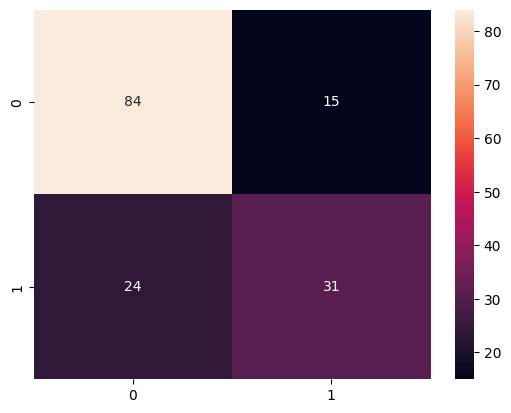

In [187]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4  => True Positive 
sns.heatmap(confusion_matrix_dt, annot=True)

#### e) AUC - ROC Curve

In [188]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt)
auc_dt

0.706060606060606

## Decision Tree - k-Fold Cross-Validation

Now using kfold, a model validation technique which is not using my pre-trained model


In [189]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [190]:
kf_dt = KFold(n_splits=5,shuffle=True)  
cv_dt = cross_val_score(model_dt, X, Y, cv=kf_dt)
np.mean(cv_dt)

0.7252695017400901

# PART 2.2. Logistic Regression 

In [191]:
from sklearn.linear_model import LogisticRegression

#### LIBLINEAR -- A Library for Large Linear Classification
The solvers implemented in the class Logistic Regression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. According to Scikit Documentation: The “liblinear” solver was the one used by default for historical reasons before version 0.22. Since then, default use is lbfgs Algorithm.

In [192]:
model_lr = LogisticRegression(solver='liblinear')

In [193]:
# Training 
model_lr.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [194]:
y_pred_lg = model_lr.predict(X_test)
y_pred_lg

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

 ## Logistic Regression - Performance Measurement

#### a) Accuracy

In [195]:
accuracy_lg = model_lr.score(X_test,Y_real) 
accuracy_lg 

0.8051948051948052

In [196]:
acc_lg = metrics.accuracy_score(Y_real,y_pred_lg)
acc_lg

0.8051948051948052

#### b) Precision

In [197]:
precision_lg = metrics.precision_score(Y_real,y_pred_lg)  
precision_lg

0.9032258064516129

#### c) Recall

In [198]:
rec_lg = metrics.recall_score(Y_real, y_pred_lg)
rec_lg

0.509090909090909

#### d) Confusion matrix

In [199]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
cm_lg

array([[96,  3],
       [27, 28]], dtype=int64)

<Axes: >

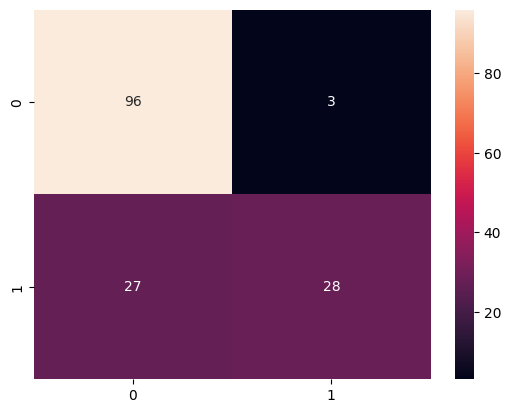

In [200]:
import seaborn as sns
sns.heatmap(cm_lg, annot=True)

#### e) AUC - ROC Curve

In [201]:
auc_lg = metrics.roc_auc_score(Y_real, y_pred_lg)
auc_lg

0.7393939393939394

## Logistic Regression - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model

In [202]:
kf_lg = KFold(n_splits=5,shuffle=True)  

In [203]:
cv_lg = cross_val_score(model_lr, X, Y, cv=kf_lg)
np.mean(cv_lg)

0.7655801714625244

# PART 2.3. Support Vector Machines (SVC)   

In [204]:
from sklearn import svm

In [205]:
model_svc = svm.SVC(kernel="linear")
model_svc

SVC(kernel='linear')

In [206]:
model_svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [207]:
Y_pred_svm = model_svc.predict(X_test)
Y_pred_svm

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## Support Vector Classification (SVC) - Performance Measurement

 #### a) Accuracy

In [208]:
accuracy_svc = model_svc.score(X_test,Y_real) 
accuracy_svc 

0.7987012987012987

In [209]:
from sklearn import metrics
acc_svc = metrics.accuracy_score(Y_real,Y_pred_svm)
acc_svc

0.7987012987012987

#### b) Precision

In [210]:
precision_svc = metrics.precision_score(Y_real,Y_pred_svm)  
precision_svc

0.8

#### c) Recall

In [211]:
rec_svc = metrics.recall_score(Y_real, Y_pred_svm)
rec_svc

0.5818181818181818

#### d) Confusion matrix

In [212]:
cm_svc = metrics.confusion_matrix(Y_real,Y_pred_svm)
cm_svc

array([[91,  8],
       [23, 32]], dtype=int64)

<Axes: >

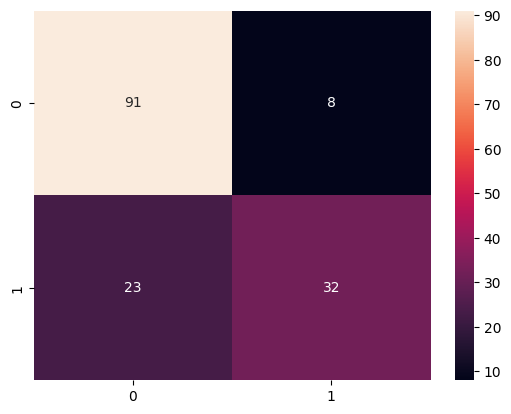

In [213]:
sns.heatmap(cm_svc, annot=True)

#### e) AUC - ROC Curve

In [214]:
auc_svc = metrics.roc_auc_score(Y_real, Y_pred_svm)
auc_svc

0.7505050505050506

## Support Vector Classification (SVC) - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model



In [215]:
kf_svc = KFold(n_splits=5,shuffle=True)  

In [216]:
cv_svc = cross_val_score(model_svc, X, Y, cv=kf_svc)
np.mean(cv_lg)

0.7655801714625244

## PART 2.4. KNN (K-Nearest Neighbors)

In [217]:
from sklearn.neighbors import KNeighborsRegressor 

In [218]:
knn_model = KNeighborsRegressor()
knn_model

KNeighborsRegressor()

In [219]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [220]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0. , 0.4, 0.8, 0.6, 0. , 0. , 0. , 0.2, 0.6, 0.4, 0.6, 0.2, 0.4,
       0. , 0.2, 0.4, 0.4, 0.8, 1. , 0.8, 0.4, 0. , 0. , 0. , 0.2, 0.8,
       0.6, 0.2, 0.4, 0.2, 0. , 0.6, 0. , 0.6, 0.8, 0.2, 0.6, 0.8, 0.8,
       0.6, 0.4, 0.4, 0.8, 1. , 0.4, 0.4, 0.2, 0. , 0.8, 0.2, 0.4, 0.4,
       0.4, 0.2, 0. , 1. , 0.2, 0.4, 0.4, 0. , 0. , 0. , 0.4, 0.6, 0. ,
       0.4, 0.4, 0.6, 0.2, 0.2, 0.6, 0. , 0.4, 0. , 0. , 0. , 0.2, 0.4,
       0.8, 0.8, 0.8, 0.8, 0. , 0.4, 0. , 0.4, 0.2, 0.2, 0.2, 0. , 0.2,
       0.6, 0. , 0.6, 0.4, 0.2, 0.2, 0.8, 0. , 0.4, 0.4, 0.6, 0. , 0.2,
       0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 1. , 0.6, 0.2, 0. , 0.4,
       0.4, 1. , 0. , 0. , 0.4, 0.6, 0.2, 0. , 0.2, 0.4, 0. , 0.6, 0.6,
       0. , 0.2, 0. , 0.4, 0. , 0.2, 0. , 0.4, 0. , 0.6, 0.2, 0. , 0.6,
       0.4, 0. , 0. , 0. , 0.2, 0.2, 0.8, 0.4, 0.4, 0.8, 0. ])

## K-Nearest Neighbors - Performance Measurement

In [221]:
import numpy as np

In [222]:
rounding = np.round(y_pred_knn)  

#### a) Accuracy

In [223]:
acc_knn = metrics.accuracy_score(Y_real,rounding)  
acc_knn 

0.7272727272727273

#### b) Precision

In [224]:
precision_knn = metrics.precision_score(Y_real,rounding)  
precision_knn

0.6585365853658537

#### c) Recall

In [225]:
recall_knn = metrics.recall_score(Y_real, rounding)
recall_knn

0.4909090909090909

#### d) Confusion Matrix

In [226]:
cm_knn = metrics.confusion_matrix(Y_real, rounding)
cm_knn

array([[85, 14],
       [28, 27]], dtype=int64)

<Axes: >

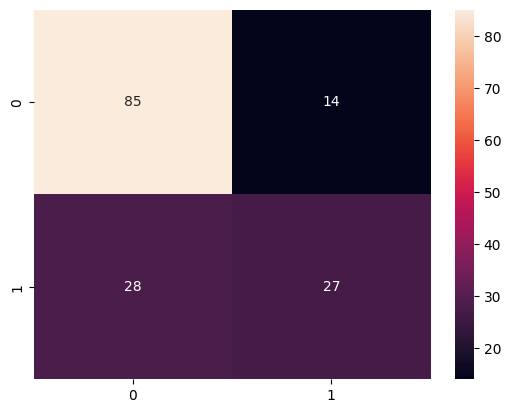

In [227]:
sns.heatmap(cm_knn, annot=True)

#### e) AUC - ROC Curve 

In [228]:
auc_knn = metrics.roc_auc_score(Y_real, rounding)
auc_knn

0.6747474747474747

## K-Nearest Neighbors - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model

In [229]:
kf_neighbors = KFold(n_splits=5,shuffle=True)  

In [230]:
cv_neighbors = cross_val_score(knn_model, X, Y, cv=kf_neighbors)
np.mean(cv_neighbors)

0.08881641129388036

# PART 3 - Valuation Analysis 

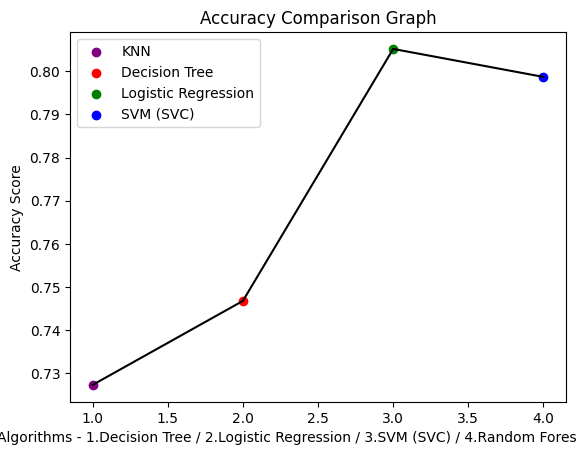

In [231]:
plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")

plt.xlabel("Algorithms - 1.Decision Tree / 2.Logistic Regression / 3.SVM (SVC) / 4.Random Forest / 5.KNN")

y = [acc_knn,accuracy_dt,accuracy_lg,acc_svc]

plt.plot([1,2,3,4],y, color = "black")


plt.scatter(1,acc_knn, marker="o", color = "purple",label = "KNN")

plt.scatter(2,accuracy_dt, marker="o", color="red", label="Decision Tree")

plt.scatter(3,accuracy_lg, marker="o", color="green", label="Logistic Regression")

plt.scatter(4,acc_svc, marker="o", color="blue", label="SVM (SVC)")

 
plt.legend()
plt.show()